Weight initialization using:
- He Uniform Initialization ( This is a common and effective initialization strategy, especially for networks with ReLU activation functions.)
- Uniform Initialization
- Pytorch Default Initialization

on MNIST dataset with relu activation

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [2]:
# using He Initialization

class Net_He(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [3]:
# using uniform init

class Net_Uniform(nn.Module):
    def __init__(self, Layers):
        super().__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1: # apply relu if not last layer
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x


In [4]:
# using pytorch default

class Net(nn.Module):
    def __init__(self, Layers):
        super().__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for l, linear_transform in zip(range(L), self.hidden):
            if l < L - 1: # apply relu if not last layer
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x

In [5]:
x = [1.1, 2.2, 3.3, 4.4, 5.4]

for i, j in zip(x, x[1:]):
    print(f"i={i}, j={j}")
print("")
for i, j in zip(range(len(x)), x):
    print(f"i={i}, j={j}")

i=1.1, j=2.2
i=2.2, j=3.3
i=3.3, j=4.4
i=4.4, j=5.4

i=0, j=1.1
i=1, j=2.2
i=2, j=3.3
i=3, j=4.4
i=4, j=5.4


In [6]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    loss_accuracy = {"training_loss": [], "validation_accuracy": []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
    
    return loss_accuracy

In [7]:
train_dataset = dsets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
criterion = nn.CrossEntropyLoss()
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

In [10]:
# using default init

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, 30)

In [11]:
# using uniform init

model_uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_uniform.parameters(), lr=learning_rate)
training_results_uniform = train(model_uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [12]:
# using he init

model_he = Net_He(layers)
optimizer = torch.optim.SGD(model_he.parameters(), lr=learning_rate)
training_results_he = train(model_he, criterion, train_loader, validation_loader, optimizer, epochs=30)

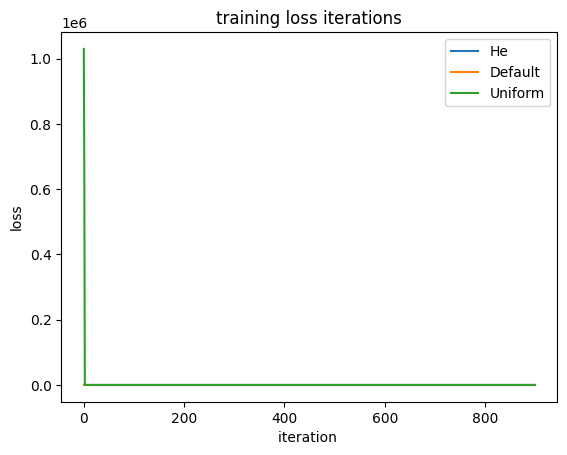

In [13]:
# Plot the loss

plt.plot(training_results_he['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ') 
plt.title('training loss iterations')
plt.legend()

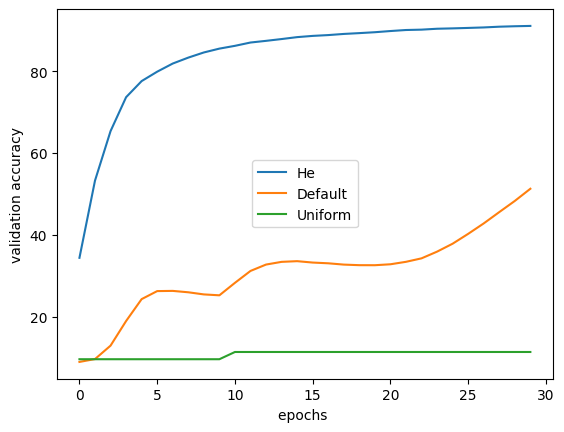

In [14]:
# Plot the accuracy

plt.plot(training_results_he['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()